##### Import Necessary Libraries

In [1]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

#load dataset
data = pd.read_csv(r"C:\Users\thars\Downloads\adidas-quarterly-sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


In [2]:
#let's plot
import plotly.express as px
fig = px.line(data_frame=data, x="Time Period",
              y="Revenue",
              title="Quarterly Sales Revenue of Adidas in Millions")
fig.show()


<Figure size 640x480 with 0 Axes>

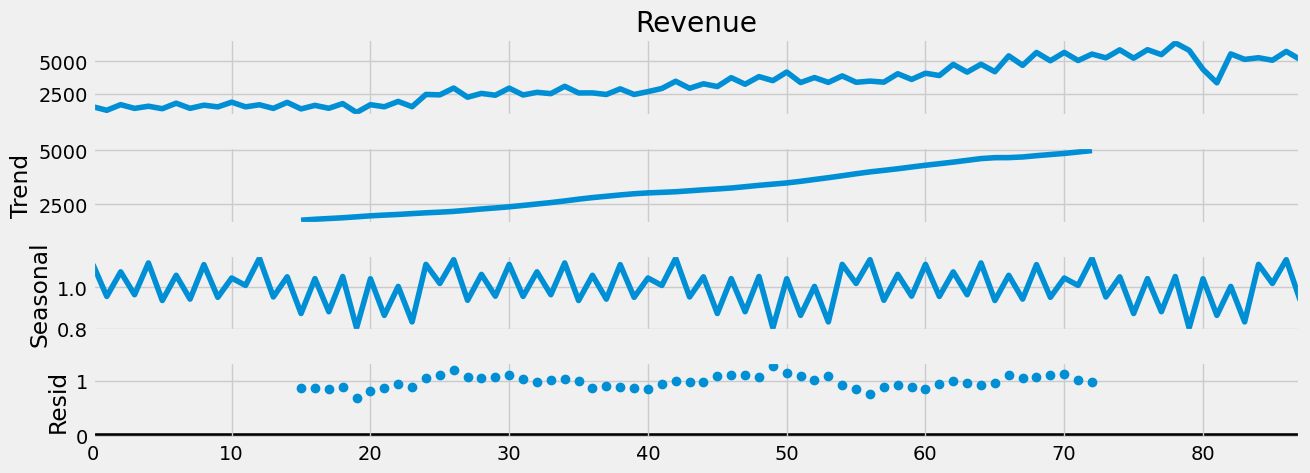

In [3]:
#let's check seasonality
result = seasonal_decompose(data["Revenue"],
                            model="multiplicative",
                            period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 5)

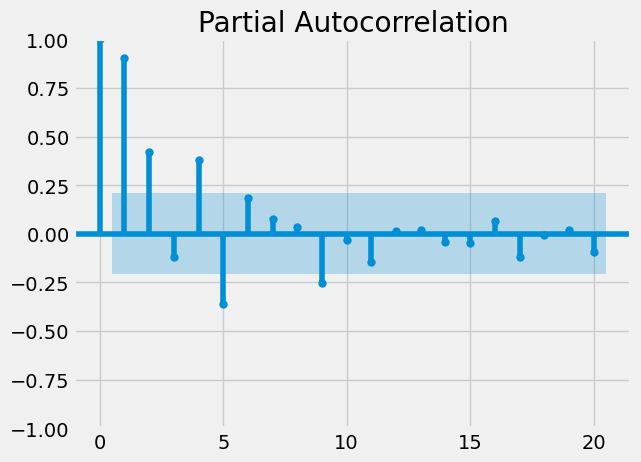

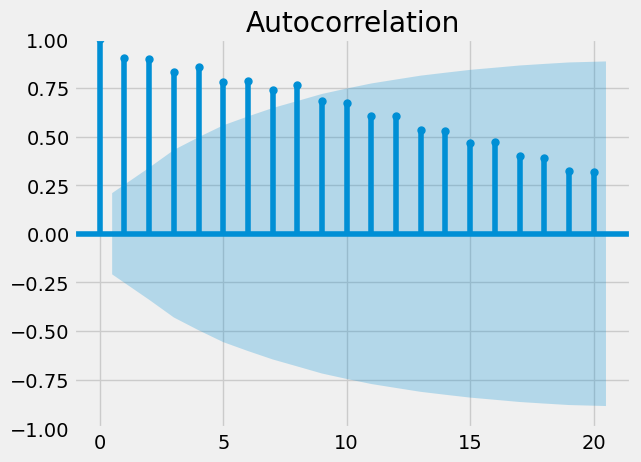

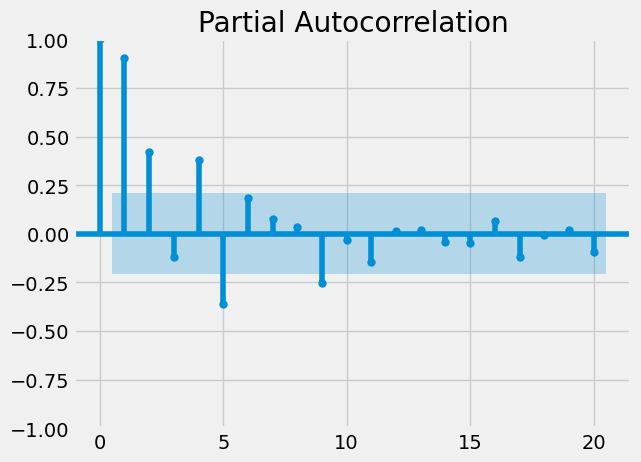

In [4]:
#the data is not stationary we'lll use d=1
plot_acf(data["Revenue"], lags=20)
plot_pacf(data["Revenue"], lags=20)

In [5]:
#her's how to use a SARIMA model to predict Adidas Revenue
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data["Revenue"],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Wed, 23 Oct 2024   AIC                           1127.041
Time:                                    12:44:07   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5794      0.383     -4.125      0.000      -2.330      -0.829
ar.L2         -1.4321      0.580   

In [6]:
#Now let’s forecast the quarterly revenue of Adidas for the next eight quarters:
predictions = model.predict(len(data), len(data) + 7)
print(predictions)

88    6078.901507
89    5186.343056
90    6293.209990
91    5752.049902
92    5911.948824
93    5499.636189
94    6389.669536
95    5728.831590
Name: predicted_mean, dtype: float64


<Axes: >

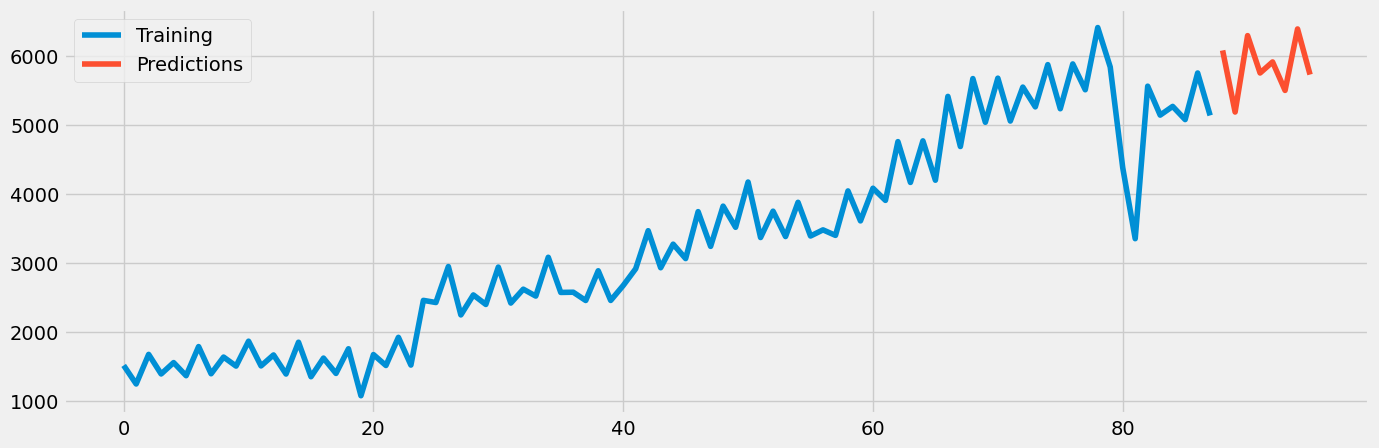

In [7]:
data["Revenue"].plot(legend=True, label="Training", figsize=(15, 5))
predictions.plot(legend=True, label="Predictions")